## Table of contents:

1. [Experimentation with UPN file (DSSGx 2022)](#Experimentation)
2. [Data Preparation ](#Census)


<a name="Experimentation"></a>
### 1. Experimenting with the UPN file 

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.metrics import plot_confusion_matrix , fbeta_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Read the CSV file: In this case we are using the synthetic K data
data = pd.read_csv('/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/train_singleUPN.csv')
data.head()

,upn,send_flag__0,send_flag__1,characteristic_code__140,characteristic_code__150,characteristic_code__160,characteristic_code__170,characteristic_code__180,level_of_need_code__1,level_of_need_code__2,...,sports_approved,educational_visit_approved,work_experience_approved,total_absences,total_nonabsences,has_census_data,has_ks2_data,has_attendance_data,fsme_on_census_day__0,fsme_on_census_day__1
0,0f3681ec-b463-4724-8657-10f541b77fbb,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.074159,0.0,0,1,1,0,0
1,f4cac22f-83ce-4b7e-8a22-1f1cf37cc97a,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.066735,0.0,0,0,1,0,0
2,9ae27b08-fb70-4f59-9726-82d95f8dbdf2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.117660,0.0,1,0,1,1,0
3,134909f3-c5a4-408e-b793-6e8752c4a894,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.041624,0.0,1,0,1,1,0
4,a247fd4b-b2b0-4fa1-853d-e8c594ce6838,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.052714,0.0,0,1,1,0,0


In [33]:
neet_data = data[["upn", "neet_ever"]]



#neet_percentage =((neet_data== "True").count())/ (neet_data.count())**100
neet_data.head()

,upn,neet_ever
0,0f3681ec-b463-4724-8657-10f541b77fbb,False
1,f4cac22f-83ce-4b7e-8a22-1f1cf37cc97a,False
2,9ae27b08-fb70-4f59-9726-82d95f8dbdf2,False
3,134909f3-c5a4-408e-b793-6e8752c4a894,False
4,a247fd4b-b2b0-4fa1-853d-e8c594ce6838,False


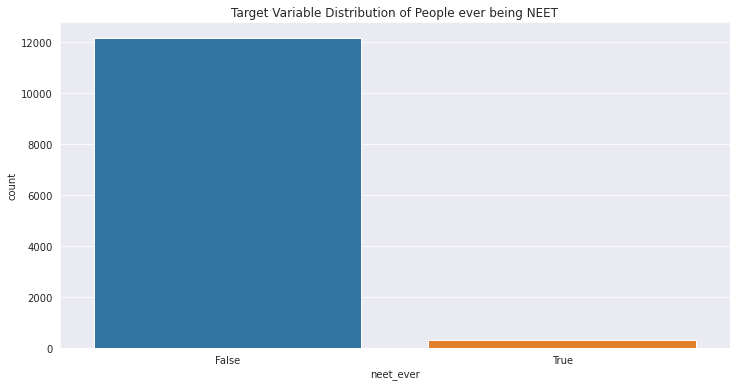

In [36]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'neet_ever', data = neet_data)
plt.title('Target Variable Distribution of People ever being NEET')
plt.show()

In [5]:
#Statistical summary
data.describe(include = 'all')

,upn,send_flag__0,send_flag__1,characteristic_code__140,characteristic_code__150,characteristic_code__160,characteristic_code__170,characteristic_code__180,level_of_need_code__1,level_of_need_code__2,...,sports_approved,educational_visit_approved,work_experience_approved,total_absences,total_nonabsences,has_census_data,has_ks2_data,has_attendance_data,fsme_on_census_day__0,fsme_on_census_day__1
count,12490,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,...,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.000000,12490.00000,12490.0,12490.000000,12490.000000
unique,12490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e2240a2b-86a6-448f-b0cb-0861e9396d0a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.925460,0.267494,0.000160,0.000400,0.000480,0.001281,0.000320,0.000320,0.224740,...,0.001236,0.003299,0.002639,0.154961,0.002245,0.484548,0.50024,1.0,0.443795,0.040753
std,NaN,0.262658,0.442670,0.012654,0.020005,0.021913,0.035770,0.017894,0.017894,0.417428,...,0.012434,0.025602,0.021338,0.114172,0.012347,0.499781,0.50002,0.0,0.496851,0.197724
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006897,0.000000,0.000000,0.00000,1.0,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.068865,0.000000,0.000000,0.00000,1.0,0.000000,0.000000
50%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.127131,0.000000,0.000000,1.00000,1.0,0.000000,0.000000
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.212362,0.000000,1.000000,1.00000,1.0,1.000000,0.000000


In [6]:
#scale numerical features for logistic model
features = data.drop(columns=['upn','neet_ever']).columns
target = data['neet_ever']

# define standard scaler
scaler = StandardScaler()

# transform data
data[features] = scaler.fit_transform(data[features])


In [10]:
# # Convert labels from True to 0 and False to 1
# target = target.map({True: 0, False: 1})

In [7]:
# # Encode categorical features
# encoder = OneHotEncoder()
# X_reshaped = np.reshape(features, (-1, 1))
# X_encoded = encoder.fit_transform(X_reshaped)

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_encoded, target)

In [7]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    #data[target].to_frame(),
                                                    target,
                                                    #stratify=data[target], #to account for class imbalance
                                                    stratify = target,
                                                    test_size=0.2,
                                                    random_state=42)

In [8]:
# # Apply ADASYN to oversample the minority class
# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(random_state=42)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)


In [8]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42, sampling_strategy= 0.8, shrinkage=0.1)

# Perform random oversampling on the training data
X_train, y_train = ros.fit_resample(X_train, y_train)



In [9]:

# Create and train the LightGBM model
#model = lgb.LGBMClassifier()
#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100)


#model.fit(X_train, y_train)

# Set the learning rate
learning_rate = 0.01

# Fit the model with the specified learning rate
model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2)
f2_score

0.0

In [10]:
#check performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      2432
        True       0.00      0.00      0.00        66

    accuracy                           0.97      2498
   macro avg       0.49      0.50      0.49      2498
weighted avg       0.95      0.97      0.96      2498



/home/aims/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aims/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aims/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


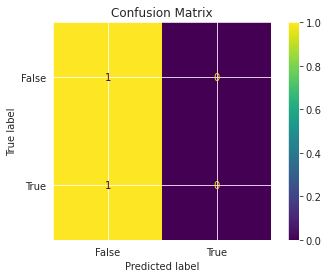

In [11]:
# Plot confusion matrix
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.title('Confusion Matrix')
plt.show()

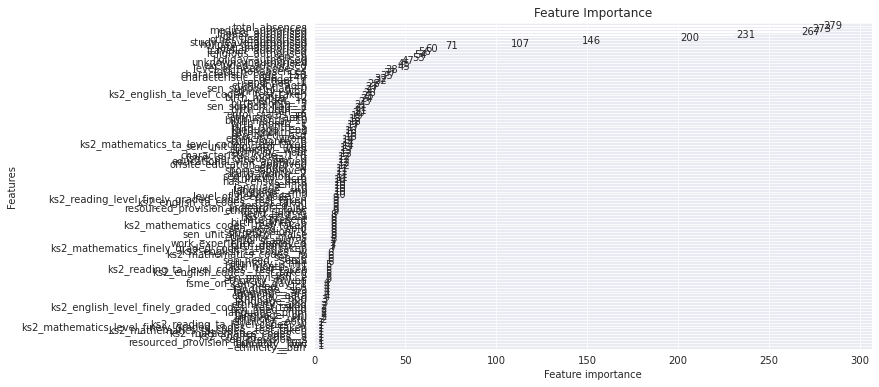

In [14]:
# Plot feature importance
lgb.plot_importance(model, figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [15]:
# Get the feature importances
importance = model.feature_importances_

# Create a list of feature names
feature_names = features#.columns.tolist()

# Create a dictionary to store the feature names and importances
feature_importance = dict(zip(feature_names, importance))

# Sort the dictionary by importance score in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their importances
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

total_absences: 279
medical_authorised: 273
illness_authorised: 267
other_authorised: 231
other_unauthorised: 200
study_leave_authorised: 146
holiday_unauthorised: 107
late_unauthorised: 71
traveller_authorised: 60
religious_authorised: 56
sen__p: 54
holiday_authorised: 53
unknown_unauthorised: 47
level_of_need_code__2: 45
excluded_authorised: 45
total_nonabsences: 38
characteristic_code__150: 37
characteristic_code__140: 35
send_flag__1: 32
gender__f: 32
ethnicity__aoth: 28
ethnicity__wbri: 27
sen_support_flag__0: 27
ks2_english_ta_level_codes__test_taken: 26
birth_month__12: 25
gender__m: 24
birth_month__3: 23
sen__k: 21
birth_month__2: 21
sen_support_flag__1: 21
enrol_status__m: 20
ethnicity__apkn: 19
birth_month__1: 18
birth_month__10: 18
language__eng: 17
birth_month__5: 17
ethnicity__wrom: 16
sen_need__asd: 16
birth_month__4: 16
sen_unit_indicator__true: 14
ks2_mathematics_ta_level_codes__test_taken: 14
birth_month__8: 14
characteristic_code__170: 13
ethnicity__nobt: 13
ethnicity

<a name="Census"></a>
### 2. Data Preparation.

  > The goal of data preparation is to ensure that the data is clean, consistent and ready for analysis

#### 2.1 Census Data Preprocessing/Preparation

 
> This data provides information related to student's grade, eligibility for free school meals and income deprivation index

In [56]:
import pandas as pd


def annotate_census(input_csv, school_info_csv, output_csv):
    # Load input CSV files : NOTE: We can write our own script to load csv files
    census_df = pd.read_csv(input_csv)
    school_info_df = pd.read_csv(school_info_csv)

    # Perform annotation operations
    merged_df = pd.merge(
        school_info_df,
        census_df,
        on=census_df["Estab"],
       how="outer"  ##right
    )
    
    merged_df[""] = pd.to_datetime(
        merged_df["EntryDate"],
        errors="coerce"
    )
    merged_df["EntryDate"] = merged_df["EntryDate"][0]
    
    merged_df["Age"] = merged_df["Age"].str.rstrip("+").astype(int)
    
    merged_df["FSME on Census Day"] = merged_df["FSME on Census Day"].map({"false": 0, "true": 1})
    
    # Save annotated data to output CSV file
    merged_df.to_csv(output_csv, index=False)


In [57]:
#from census_annotation import annotate_census

input_csv = "/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/census_original_jan17.csv"
school_info_csv = "/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/secondary_schools_original.csv"
output_csv = "/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/output/output.csv"

annotate_census(input_csv, school_info_csv, output_csv)


In [58]:
data_census = pd.read_csv('/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/ouput.csv')
data_census.head()

,key_0,Estab_x,Establishment (anon),School Name,Type,Status,Area,Postcode_x,Electoral Ward*,Estab_y,...,postTown,AddressLine1,AddressLine2,AddressLine3,AddressLine4,AddressLine5,NativeID,FSME on Census Day,Age,Unnamed: 45
0,184568,765638672,170436,Holmer Green Senior School,Upper,Maintained,Chiltern,HP15 6SP,"The Wooburns, Bourne End and Hedsor",184568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,2012-09-05
1,159456,714526399,227136,Cottesloe School - The,NaN,Academy,Chiltern,LU7 0NY,Penn Wood and Old Amersham,159456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2015-09-03
2,271553,765139963,189210,Buckinghamshire University Technical College,Grammar,Maintained,Wycombe,HP21 8PB,Wing,271553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2016-09-05
3,227294,661836702,189042,Cressex Community School,All through,Academy,Wycombe,HP6 5HA,Winslow,227294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2015-09-04
4,114102,775062328,171444,Sir Henry Floyd Grammar School,Grammar,Maintained,Wycombe,HP21 7RP,The Risboroughs,114102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2012-09-06


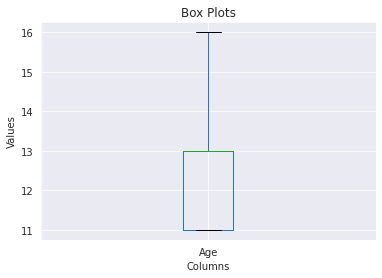

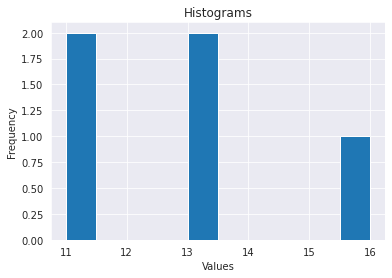

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/ouput.csv")

# Extract the column names you want to plot
columns_to_plot = ["Age"]

# Plot box plots for the selected columns
df[columns_to_plot].plot(kind='box')
plt.title('Box Plots')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Plot histograms for the selected columns
df[columns_to_plot].hist()
plt.title('Histograms')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


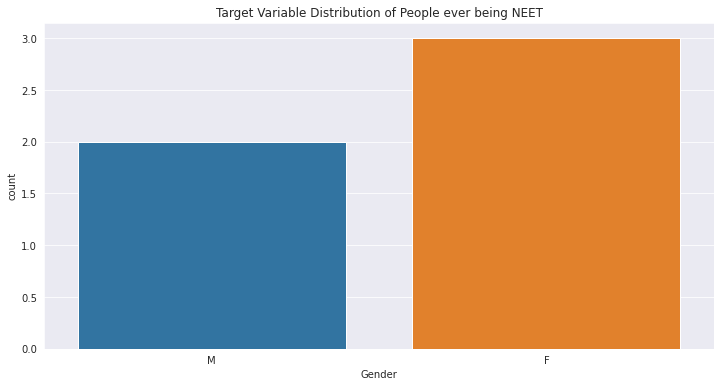

In [6]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Gender', data = df)
plt.title('Target Variable Distribution of People ever being NEET')
plt.show()

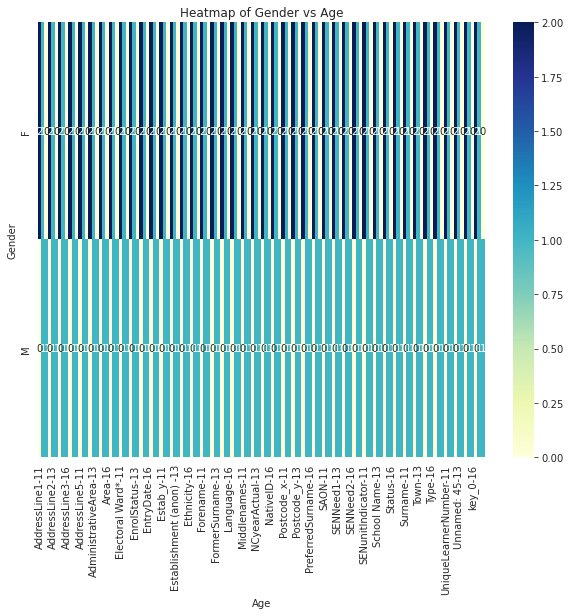

In [8]:
df = df

# Specify the two columns for the heatmap
column1 = 'Gender'
column2 = 'Age'

# Create a pivot table to aggregate the data
pivot_table = df.pivot_table(index=column1, columns=column2, aggfunc=len, fill_value=0)

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')

# Set the title and labels
plt.title('Heatmap of {} vs {}'.format(column1, column2))
plt.xlabel(column2)
plt.ylabel(column1)

# Display the heatmap
plt.show()

In [60]:
## Correlation analysis

correlation_matrice = df.corr()
print(correlation_matrice)

                          key_0   Estab_x  Establishment (anon)    Estab_y  \
key_0                  1.000000 -0.245489               0.050946  1.000000   
Estab_x               -0.245489  1.000000              -0.466014 -0.245489   
Establishment (anon)   0.050946 -0.466014               1.000000  0.050946   
Estab_y                1.000000 -0.245489               0.050946  1.000000   
Surname                     NaN       NaN                    NaN       NaN   
Forename                    NaN       NaN                    NaN       NaN   
Middlenames                 NaN       NaN                    NaN       NaN   
PreferredSurname            NaN       NaN                    NaN       NaN   
FormerSurname               NaN       NaN                    NaN       NaN   
DoB                         NaN       NaN                    NaN       NaN   
NCyearActual           0.759926  0.065945              -0.538709  0.759926   
UniqueLearnerNumber         NaN       NaN                    NaN

#### Exploratory Data Analysis (EDA)

In [62]:
#Statistical summary
df.describe(include = 'all')

,key_0,Estab_x,Establishment (anon),School Name,Type,Status,Area,Postcode_x,Electoral Ward*,Estab_y,...,postTown,AddressLine1,AddressLine2,AddressLine3,AddressLine4,AddressLine5,NativeID,FSME on Census Day,Age,Unnamed: 45
count,5.000000,5.000000e+00,5.00000,5,4,5,5,5,5,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00000,5
unique,NaN,NaN,NaN,5,3,2,2,5,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,Cottesloe School - The,Grammar,Maintained,Wycombe,HP21 8PB,Wing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-05
freq,NaN,NaN,NaN,1,2,3,3,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,191394.600000,7.364408e+08,189453.60000,NaN,NaN,NaN,NaN,NaN,NaN,191394.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.80000,NaN
std,60734.995396,4.799425e+07,22946.71451,NaN,NaN,NaN,NaN,NaN,NaN,60734.995396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.04939,NaN
min,114102.000000,6.618367e+08,170436.00000,NaN,NaN,NaN,NaN,NaN,NaN,114102.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00000,NaN
25%,159456.000000,7.145264e+08,171444.00000,NaN,NaN,NaN,NaN,NaN,NaN,159456.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00000,NaN
50%,184568.000000,7.651400e+08,189042.00000,NaN,NaN,NaN,NaN,NaN,NaN,184568.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00000,NaN
75%,227294.000000,7.656387e+08,189210.00000,NaN,NaN,NaN,NaN,NaN,NaN,227294.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00000,NaN


In [63]:
import pandas as pd
import os


class CsvLoader:
    def __init__(self, directory):
        self.directory = directory

    def load_csvs(self):
        dfs = []
        for filename in os.listdir(self.directory):
            filepath = os.path.join(self.directory, filename)
            if os.path.isfile(filepath) and filename.lower().endswith(".csv"):
                df = pd.read_csv(filepath)
                dfs.append(df)
        if dfs:
            return pd.concat(dfs, axis=0, ignore_index=True)
        else:
            return None


def preprocess_data(df):
    # Fill NaN values with 0
    df.fillna(0, inplace=True)

    # Remove duplicates in rows
    df.drop_duplicates(keep='first', inplace=False)

    # Drop empty rows
    df.dropna(axis=0, how='all', inplace=False)

    return df


def annotate_census(input_directory, school_info_csv, output_csv):
    # Load input CSV files
    csv_loader = CsvLoader(input_directory)
    census_df = csv_loader.load_csvs()
    school_info_df = pd.read_csv(school_info_csv)

    if census_df is None:
        print("No CSV files were loaded.")
        return

    # Check if "Estab" column is present in both DataFrames
    if "Estab" not in census_df.columns:
        print("Missing 'Estab' column in census data.")
        return
    if "Estab" not in school_info_df.columns:
        print("Missing 'Estab' column in school info data.")
        return

    # Perform annotation operations
    merged_df = pd.merge(census_df, school_info_df, on="Estab", how="outer")

    
    merged_df["EntryDate"] = pd.to_datetime(merged_df["EntryDate"], errors="coerce")
    merged_df["Year"] = merged_df["EntryDate"].dt.strftime("%Y")
    # Handle missing values in "Age" column removing + at the end of age.
    #["Age"] = merged_df["Age"].str.rstrip("+").astype(int)
    # Remove "+" symbol at the end of age values
    merged_df["Age"] = merged_df["Age"].str.rstrip("+").astype(float).astype(int, errors='ignore')

    

    
    merged_df["FSME on Census Day"] = merged_df["FSME on Census Day"].map({"false": 0, "true": 1})

    # Preprocess the data
    merged_df = preprocess_data(merged_df)

    # Create the output directory if it doesn't exist
    output_directory = os.path.dirname(output_csv)
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Save annotated data to output CSV file
    merged_df.to_csv(output_csv, index=False)

    print("Data saved to:", output_csv)





In [51]:
# Example usage
input_directory = "/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/census_original_csv_file"
school_info_csv = "/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/secondary_schools_original.csv"
output_csv = "/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/output/output.csv"

annotate_census(input_directory, school_info_csv, output_csv )

Data saved to: /home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/output/output.csv


In [53]:
data2 = pd.read_csv("/home/aims/Documents/NEET PROJECT/NEET-TRIAL/data/census/output/output.csv")
data2.tail()

,Estab,UPN,Surname,Forename,Middlenames,PreferredSurname,FormerSurname,Gender,DoB,EnrolStatus,...,SENNeed2,postTown,Establishment (anon),School Name,Type,Status,Area,Postcode_y,Electoral Ward*,Year
30,765638672,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0.0,170436.0,Holmer Green Senior School,Upper,Maintained,Chiltern,HP15 6SP,"The Wooburns, Bourne End and Hedsor",0
31,714526399,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0.0,227136.0,Cottesloe School - The,0,Academy,Chiltern,LU7 0NY,Penn Wood and Old Amersham,0
32,765139963,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0.0,189210.0,Buckinghamshire University Technical College,Grammar,Maintained,Wycombe,HP21 8PB,Wing,0
33,661836702,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0.0,189042.0,Cressex Community School,All through,Academy,Wycombe,HP6 5HA,Winslow,0
34,775062328,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0.0,171444.0,Sir Henry Floyd Grammar School,Grammar,Maintained,Wycombe,HP21 7RP,The Risboroughs,0


In [64]:
#Statistical summary
data2.describe(include = 'all')

,Estab,UPN,Surname,Forename,Middlenames,PreferredSurname,FormerSurname,Gender,DoB,EnrolStatus,...,SENNeed2,postTown,Establishment (anon),School Name,Type,Status,Area,Postcode_y,Electoral Ward*,Year
count,3.500000e+01,35,35.0,35.0,35.0,35.0,35.0,35,35.0,35,...,35,35.0,35.000000,35,35,35,35,35,35,35.000000
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,3,NaN,3,...,2,NaN,NaN,6,4,3,3,6,6,NaN
top,NaN,0,NaN,NaN,NaN,NaN,NaN,F,NaN,C,...,0,NaN,NaN,0,0,0,0,0,0,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,16,NaN,29,...,34,NaN,NaN,30,31,30,30,30,30,NaN
mean,1.053542e+08,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,27064.800000,NaN,NaN,NaN,NaN,NaN,NaN,1728.714286
std,2.619192e+08,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,67721.731812,NaN,NaN,NaN,NaN,NaN,NaN,716.051574
min,9.052000e+04,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.536750e+05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000
50%,1.883790e+05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000
75%,2.078175e+05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000


In [ ]:
### Census preparation without dvc pipeline
import pandas as pd
import argparse
from src.constants import UNKNOWN_CODES, NA_VALS, CensusDataColumns
from src import merge_utils as mu
from src import file_utils as f
from src import log_utils as l
from src import data_utils as d
from src import py_utils as py

def merged_census_validation(df):
    assert not d.isna(df[CensusDataColumns.data_date], na_vals=NA_VALS).any(), \
        f"Some data dates are missing. Please check the input census file and ensure there are no entries with value {NA_VALS} in the data_date column. Then check the merge_data script for any bugs."
    try:
        pd.to_datetime(df[CensusDataColumns.data_date], errors="raise")
    except ValueError as e:
        print(
            f"There was an error in parsing the data_date column. Please check the entries for any malformed dates. This may be a bug in the merge_data script."
        )
        raise e
    fsme_values = set(df[CensusDataColumns.fsme_on_census_day].str.lower().unique())
    fsme_values_expected = {"false", "true"}
    assert (
        fsme_values == fsme_values_expected
    ), f"fsme_on_census_day has extra values {fsme_values - fsme_values_expected} when lower-cased. Only  values {fsme_values_expected} are allowed. Please correct."


def annotate_school_census(input_file, school_info_file, output_file, debug=False):
    logger = l.get_logger(name=f.get_canonical_filename(__file__), debug=debug)

    df = d.load_csv(
        input_file,
        drop_empty=False,
        drop_single_valued=False,
        drop_duplicates=False,
        read_as_str=True,
        na_vals=NA_VALS,
        use_na=True,
        logger=logger,
    )
    logger.info("Doing some validation on the incoming merged census df")
    merged_census_validation(df)

    school_df = d.load_csv(
        school_info_file,
        drop_empty=False,
        drop_single_valued=False,
        drop_missing_upns=False,
        drop_duplicates=False,
        read_as_str=True,
        na_vals=NA_VALS,
        use_na=True,
        logger=logger,
    )

    logger.info(f"Initial row count {len(df)}")
    logger.info(f"Initial column count {len(df.columns)}")

    logger.info(f"Merging establishment information into census")
    df = mu.merge_priority_dfs(
        [school_df, df],  # The school df is the higher priority information
        on=CensusDataColumns.establishment_number,
        how="right",
        unknown_vals=UNKNOWN_CODES,
        na_vals=NA_VALS,
    )
    logger.info(f"Adding column for end_year of school term")
    df[CensusDataColumns.census_period_end] = pd.to_datetime(
        df[CensusDataColumns.data_date], errors="raise"
    )
    df[CensusDataColumns.year] = (
        df[CensusDataColumns.census_period_end]
        .apply(lambda x: x.year)
        .astype(pd.Int16Dtype())
    )
    logger.info(f"Removing + at the end of ages")
    df[CensusDataColumns.age] = (
        df[CensusDataColumns.age]
        .apply(lambda x: py.remove_suffix(x, "+"))
        .astype(pd.Int16Dtype())
    )

    logger.info(
        f"Converting census column {CensusDataColumns.fsme_on_census_day} to a binary column"
    )
    # There shouldn't be any na values
    logger

In [ ]:
import pandas as pd

from src.merge_utils import merge_priority_dfs
from src.file_utils import tmp_path
from src.log_utils import get_logger
from src.data_utils import load_csv
from src.constants import NA_VALS, UNKNOWN_CODES, SchoolInfoColumns


def annotate_ks4(input_path, school_info_path, output_path):
    # Set up logging
    logger = get_logger(name=__name__)

    # Load KS4 dataset
    ks4_df = load_csv(
        input_path,
        drop_empty=False,
        drop_single_valued=False,
        drop_duplicates=False,
        read_as_str=True,
        na_vals=NA_VALS,
        use_na=True,
        logger=logger,
    )

    # Load school info dataset
    school_df = load_csv(
        school_info_path,
        drop_empty=False,
        drop_single_valued=False,
        drop_missing_upns=False,
        drop_duplicates=False,
        read_as_str=True,
        na_vals=NA_VALS,
        use_na=True,
        logger=logger,
    )

    # Merge establishment information into KS4 dataset
    logger.info("Merging establishment information into KS4 dataset")
    ks4_df = merge_priority_dfs(
        [school_df, ks4_df],
        on=SchoolInfoColumns.la_establishment_number,
        how="right",
        unknown_vals=UNKNOWN_CODES,
        na_vals=NA_VALS,
    )

    # Select the year from the 'EntryDate' column
    logger.info("Selecting the year from the 'EntryDate' column")
    ks4_df["Year"] = pd.to_datetime(ks4_df["EntryDate"], errors="coerce").dt.year

    # Save annotated data to output file
    output_csv = tmp_path(output_path)
    logger.info(f"Saving annotated data to {output_csv}")
    ks4_df.to_csv(output_csv, index=False)


if __name__ == "__main__":
    input_csv = "/path/to/input_ks4.csv"
    school_info_csv = "/path/to/school_info.csv"
    output_csv = "/path/to/output_annotated_ks4.csv"

    annotate_ks4(input_csv, school_info_csv, output_csv)


In [ ]:
import pandas as pd
import os


class CsvLoader:
    def __init__(self, directory):
        self.directory = directory

    def load_csvs(self):
        dfs = []
        for filename in os.listdir(self.directory):
            filepath = os.path.join(self.directory, filename)
            if os.path.isfile(filepath) and filename.lower().endswith(".csv"):
                df = pd.read_csv(filepath)
                dfs.append(df)
        if dfs:
            return pd.concat(dfs, axis=0, ignore_index=True)
        else:
            return None


def preprocess_data(df):
    # Fill NaN values with 0
    df.fillna(0, inplace=True)

    # Remove duplicates in rows
    df.drop_duplicates(keep='first', inplace=False)

    # Drop empty rows
    df.dropna(axis=0, how='all', inplace=False)

    return df


def annotate_KS4(input_directory, school_info_csv, output_csv):
    # Load input CSV files
    csv_loader = CsvLoader(input_directory)
    KS4_df = csv_loader.load_csvs()
    school_info_df = pd.read_csv(school_info_csv)

    if KS4_df is None:
        print("No CSV files were loaded.")
        return

    # Check if "Estab" column is present in both DataFrames
    if "Estab" not in KS4_df.columns:
        print("Missing 'Estab' column in census data.")
        return
    if "Estab" not in school_info_df.columns:
        print("Missing 'Estab' column in school info data.")
        return

    # Perform annotation operations
    merged_df = pd.merge(KS4_df, school_info_df, on="LAEstab (anon)", how="outer")

    merged_df["EntryDate"] = pd.to_datetime(merged_df["EntryDate"], errors="coerce")
    merged_df["Year"] = merged_df["EntryDate"].dt.strftime("%Y")


    # Preprocess the data
    merged_df = preprocess_data(merged_df)

    # Create the output directory if it doesn't exist
    output_directory = os.path.dirname(output_csv)
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Save annotated data to output CSV file
    merged_df.to_csv(output_csv, index=False)

    print("Data saved to:", output_csv)
